In [60]:
import pandas as pd
import numpy as np
import frust.vis as vis

In [61]:
conversion_factor       =  627.509474

df_ligs = pd.read_parquet("output_files/full_font_xtb/ligs.parquet")
df_generics = pd.read_parquet("output_files/full_font_xtb/generics.parquet")
df_uniques = pd.read_parquet("output_files/full_font_xtb/uniques.parquet")

df_ts1 = pd.read_parquet("output_files/full_font_xtb/ts1.parquet")
df_ts2 = pd.read_parquet("output_files/full_font_xtb/ts2.parquet")
df_ts3 = pd.read_parquet("output_files/full_font_xtb/ts3.parquet")
df_ts4 = pd.read_parquet("output_files/full_font_xtb/int3.parquet")

In [62]:
df_ligs = df_ligs .sort_values(by=["ligand_name", "rpos", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]).groupby(["ligand_name"]).head(1)
df_generics = df_generics.sort_values(by=["ligand_name", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]).groupby(["ligand_name"]).head(1)
df_uniques = df_uniques.sort_values(by=["ligand_name", "rpos", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]).groupby(["custom_name", "rpos"]).head(1)

df_ligs = df_ligs[["ligand_name", "rpos", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})
df_generics = df_generics[["ligand_name", "rpos", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})
df_uniques = df_uniques[["ligand_name", "rpos", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})

df_ts1 = df_ts1[["ligand_name", "rpos", "smiles", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})
df_ts2 = df_ts2[["ligand_name", "rpos", "smiles", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})
df_ts3 = df_ts3[["ligand_name", "rpos", "smiles", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})
df_ts4 = df_ts4[["ligand_name", "rpos", "smiles", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT_SP_EE"})


for df in [df_ligs, df_generics, df_uniques, df_ts1, df_ts2, df_ts3, df_ts4]:
    df["DFT_SP_EE"] *= conversion_factor

In [63]:
df_generics

,ligand_name,rpos,DFT_SP_EE
347,HBpin-mol,None,-258394.187013
249,HH,None,-736.034760
282,catalyst,None,-417604.984675
156,dimer,None,-835242.303098


In [64]:
dimer_dft = df_generics.loc[df_generics["ligand_name"] == "dimer", "DFT_SP_EE"].iloc[0]
H2_dft = df_generics.loc[df_generics["ligand_name"] == "HH", "DFT_SP_EE"].iloc[0]
cat_dft = df_generics.loc[df_generics["ligand_name"] == "catalyst", "DFT_SP_EE"].iloc[0]
HBpinmol_dft = df_generics.loc[df_generics["ligand_name"] == "HBpin-mol", "DFT_SP_EE"].iloc[0]
print(dimer_dft, H2_dft, cat_dft, HBpinmol_dft)

-835242.3030976757 -736.0347599326439 -417604.98467544967 -258394.18701306346


In [65]:
df_ligs.drop(columns=["rpos"], inplace=True)

df_ts1 = df_ts1.merge(df_ligs, on=["ligand_name"], suffixes=["_ts1", "_lig"])
df_ts2 = df_ts2.merge(df_ligs, on=["ligand_name"], suffixes=["_ts2", "_lig"])
df_ts3 = df_ts3.merge(df_ligs, on=["ligand_name"], suffixes=["_ts3", "_lig"])
df_ts4 = df_ts4.merge(df_ligs, on=["ligand_name"], suffixes=["_ts4", "_lig"])
df_ts3

,ligand_name,rpos,smiles,DFT_SP_EE_ts3,DFT_SP_EE_lig
0,1-benzylpyrrole,3,N1(CC2=CC=CC=C2)C=CC=C1,-9.767258e+05,-301458.479347
1,1-benzylpyrrole,4,N1(CC2=CC=CC=C2)C=CC=C1,-9.767229e+05,-301458.479347
2,1-benzylpyrrole,5,N1(CC2=CC=CC=C2)C=CC=C1,-9.767223e+05,-301458.479347
3,1-benzylpyrrole,8,N1(CC2=CC=CC=C2)C=CC=C1,-9.767300e+05,-301458.479347
4,1-benzylpyrrole,9,N1(CC2=CC=CC=C2)C=CC=C1,-9.767298e+05,-301458.479347
5,1-methylindole,4,CN1C2=C(C=CC=C2)C=C1,-9.281658e+05,-252900.676231
6,1-methylindole,5,CN1C2=C(C=CC=C2)C=C1,-9.281657e+05,-252900.676231
7,1-methylindole,6,CN1C2=C(C=CC=C2)C=C1,-9.281656e+05,-252900.676231
8,1-methylindole,7,CN1C2=C(C=CC=C2)C=C1,-9.281658e+05,-252900.676231
9,1-methylindole,8,CN1C2=C(C=CC=C2)C=C1,-9.281741e+05,-252900.676231


In [66]:
df_ts1["dE"] = (2*(df_ts1["DFT_SP_EE_ts1"] - df_ts1["DFT_SP_EE_lig"]) - dimer_dft) / 2
df_ts2["dE"] = (2*(df_ts2["DFT_SP_EE_ts2"] - df_ts2["DFT_SP_EE_lig"]) - dimer_dft) / 2
df_ts3["dE"] = (2*(df_ts3["DFT_SP_EE_ts3"] - df_ts3["DFT_SP_EE_lig"] - HBpinmol_dft + H2_dft) - dimer_dft) / 2
df_ts4["dE"] = (2*(df_ts4["DFT_SP_EE_ts4"] - df_ts4["DFT_SP_EE_lig"] - HBpinmol_dft + H2_dft) - dimer_dft) / 2

In [67]:
df_all = pd.concat([df_ts1["dE"], df_ts2["dE"], df_ts3["dE"], df_ts4["dE"]], keys=["dE_ts1", "dE_ts2", "dE_ts3", "dE_ts4"], axis=1)
df_all = pd.concat([df_ts1[["ligand_name", "rpos", "smiles"]], df_all], axis=1)
df_all_raw = df_all.copy()

df_all["dE_ts1"] = (df_all["dE_ts1"] - 2.537739) / 0.865432
df_all["dE_ts2"] = (df_all["dE_ts2"] - 8.306087) / 0.647606
df_all["dE_ts3"] = (df_all["dE_ts3"] - 0.056540) / 0.564222
df_all["dE_ts4"] = (df_all["dE_ts4"] + 4.528334) / 0.640283

In [68]:
df_all[["ligand_name", "rpos", "dE_ts1", "dE_ts2", "dE_ts3", "dE_ts4"]]

,ligand_name,rpos,dE_ts1,dE_ts2,dE_ts3,dE_ts4
0,1-benzylpyrrole,3,34.582870,14.996140,21.112320,26.606282
1,1-benzylpyrrole,4,34.150458,18.281966,26.225501,24.911961
2,1-benzylpyrrole,5,37.525604,21.480706,27.294054,27.176372
3,1-benzylpyrrole,8,18.785238,6.374127,13.748129,8.702022
4,1-benzylpyrrole,9,20.609635,16.578164,14.062913,11.005060
5,1-methylindole,4,34.483680,23.045707,24.944692,24.743064
6,1-methylindole,5,34.845896,23.032690,25.288122,24.477956
7,1-methylindole,6,35.326464,22.130732,25.324581,24.341115
8,1-methylindole,7,30.781769,25.440550,24.954396,22.539681
9,1-methylindole,8,22.176526,15.907698,10.293688,9.421392


In [73]:
from frust.utils.analytics import build_annotated_frame
from IPython.display import HTML

print([col for col in df_all.columns if "dE" in col])

_, html = build_annotated_frame(
    df_all,
    "ligand_name",
    energy_cols=[col for col in df_all.columns if "dE" in col],
    fixed_bond_px=40,
    note_font_px=15,
    annotation_scale=0.7,
    size=(400,400),
    show_rpos=False
)
HTML(html)

['dE_ts1', 'dE_ts2', 'dE_ts3', 'dE_ts4']


In [70]:
df_DFT_dGs_ts1 = pd.read_csv("misc/DFT_dGs_ts1_font.csv", index_col=0)
df_DFT_dGs_ts2 = pd.read_csv("misc/DFT_dGs_ts2_font.csv", index_col=0)
df_DFT_dGs_ts3 = pd.read_csv("misc/DFT_dGs_ts3_font.csv", index_col=0)
df_DFT_dGs_ts4 = pd.read_csv("misc/DFT_dGs_ts4_font.csv", index_col=0)

df_dEdG_ts1 = pd.merge(df_all_raw, df_DFT_dGs_ts1)
df_dEdG_ts2 = pd.merge(df_all_raw, df_DFT_dGs_ts2)
df_dEdG_ts3 = pd.merge(df_all_raw, df_DFT_dGs_ts3)
df_dEdG_ts4 = pd.merge(df_all_raw, df_DFT_dGs_ts4)

In [78]:
df_DFT_dGs_ts3

,ligand_name,rpos,dG_ts3
0,1-methylindole,5,20.373574
1,1-methylindole,7,25.450590
2,1-methylindole,8,17.142981
3,1-methylindole,9,19.421268
4,1-methylpyrrole,2,17.407736
5,1-methylpyrrole,3,18.856019
6,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,14.500339
7,2-methoxyfuran,3,16.038213
8,2-methoxyfuran,4,20.203287
9,2-methoxyfuran,5,12.663760


[INFO]: Linear relation: y = 0.865432x + 2.537739


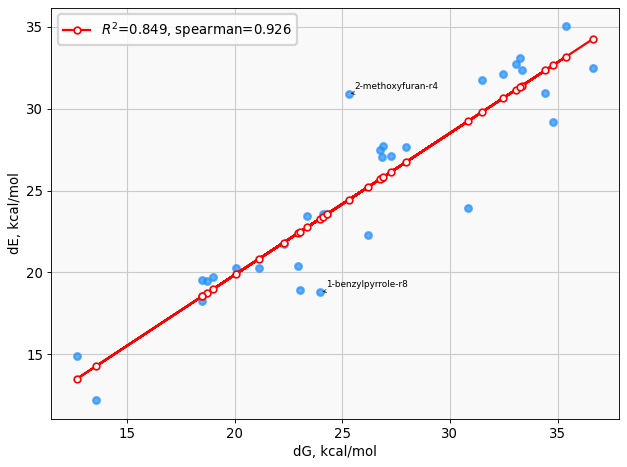

[INFO]: Linear relation: y = 0.647606x + 8.306087


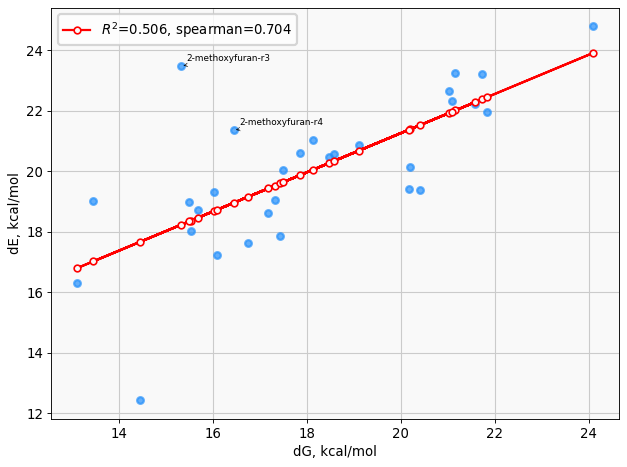

[INFO]: Linear relation: y = 0.564222x + 0.056540


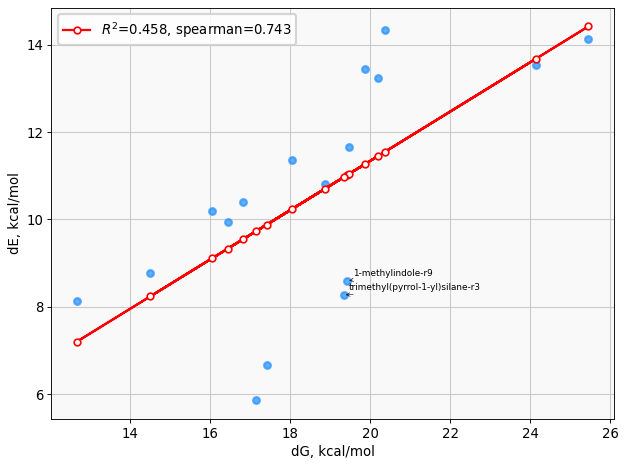

[INFO]: Linear relation: y = 0.640283x - 4.528334


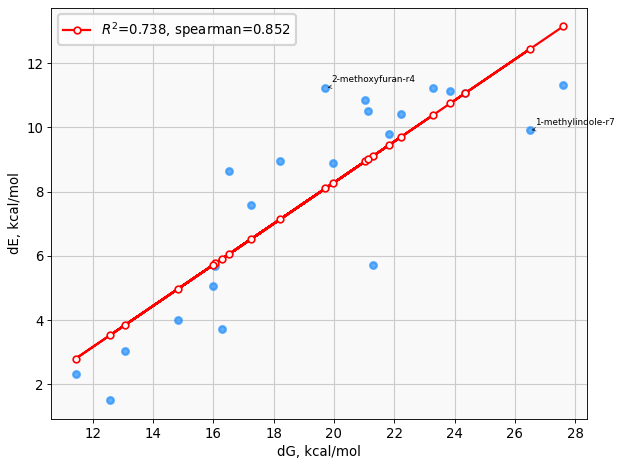

In [72]:
vis.plot_regression_outliers(df_dEdG_ts1, x_col="dG_ts1", y_col="dE_ts1")
vis.plot_regression_outliers(df_dEdG_ts2, x_col="dG_ts2", y_col="dE_ts2")
vis.plot_regression_outliers(df_dEdG_ts3, x_col="dG_ts3", y_col="dE_ts3")
vis.plot_regression_outliers(df_dEdG_ts4, x_col="dG_ts4", y_col="dE_ts4")